# **Clustering**

## **1. One successful example for k-means, hierarchical clustering and dbscan**

### **1-(1) k-means**

**<K-Means 절차>** <br>
* 1단계: 파라미터 k 결정 (k > 0) 
* 2단계: 중심체를 시작할 때 k개의 점을 임의로 선택
* 3단계: 가장 가까운 중심에 모든 점을 할당하여 클러스터 형성
* 4단계: 각 클러스터의 중심을 다시 계산(각 클러스터의 평균 계산)
* 5단계: 중심이 변하지 않을 때까지 3단계 반복

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

**<군집화를 하지 않은 원본 데이터셋>**

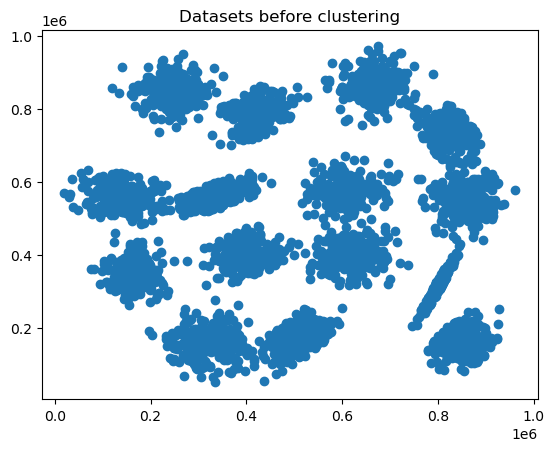

In [45]:
s_kmeans_df = pd.read_csv("s-set1.csv")

k1_training_points = s_kmeans_df[["col1", "col2"]]
k1_training_labels = s_kmeans_df["target"]

plt.scatter(k1_training_points["col1"], k1_training_points["col2"])
plt.title("Datasets before clustering")
plt.show()

-----------
**<최적의 cluster 개수 구하기>**

In [9]:
import warnings # 오류제어
warnings.filterwarnings("ignore", category=FutureWarning) #오류삭제

In [48]:
from sklearn.metrics.cluster import adjusted_rand_score
# 최적의 값 구하는 알고리즘
max=0.0
for a in range(1,50):
    kmeans = KMeans(n_clusters=a).fit(k1_training_points)
    arc = adjusted_rand_score(k1_training_labels, kmeans.labels_)
    if(max < arc):
        max = arc
        result_a = a

print("result_a : ",result_a)
print("arc : ",max)

result_a :  15
arc :  0.9949625487853107


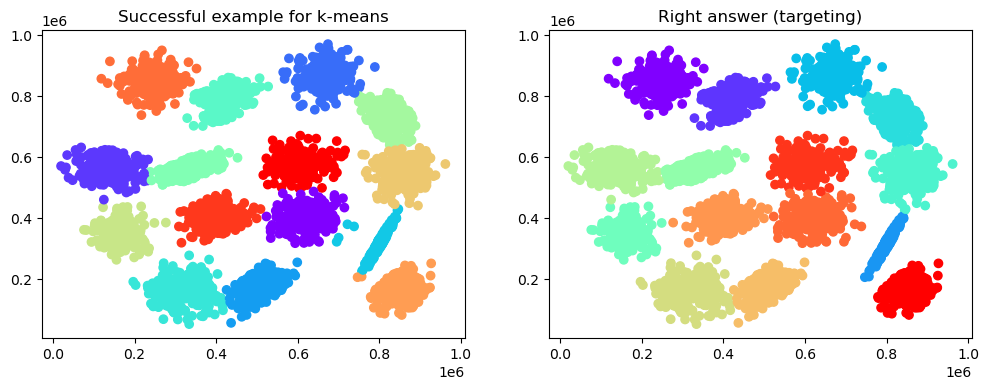

In [49]:
kmeans = KMeans(n_clusters=result_a).fit(k1_training_points)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(k1_training_points["col1"], k1_training_points["col2"], c=kmeans.labels_, cmap='rainbow')
plt.title("Successful example for k-means")

plt.subplot(1, 2, 2)
plt.scatter(k1_training_points["col1"], k1_training_points["col2"], c = k1_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()

* **K-Means Clustering의 장점**
    * 비교적 구현이 간단하다.
    * 대규모 데이터셋을 사용할 때 효율적이다.
---------
k-means 방법을 사용하여 's-set1.csv' 데이터셋을 클러스터링한 결과는 왼쪽 그래프다. <br>
정답과 비교하였을 때 몇몇 데이터가 다르게 군집화된 것을 확인할 수 있지만, 전체적으로는 비슷한 결과를 보인다. <br>
클러스터링 정답과 비교하였을 때 99%의 정확도를 보여주므로 성공적인 클러스터링 결과를 얻었다고 할 수 있다. <br>
이 데이터셋은 {https://github.com/milaan9/Clustering-Datasets}의 데이터셋 중 상대적으로 대규모 데이터셋에 속하는데, <br>
클러스터링 결과가 성공적이므로 k-means가 대규모 데이터셋에서도 효과적으로 적동함을 알 수 있다. <br>
또한, 비교적 구현이 간단하여 빠른 클러스터링 결과를 얻을 수 있었다. <br>

###  **1-(2) hierarchical clustering**

**<군집화를 하지 않은 원본 데이터셋 & Dengdorgram>**

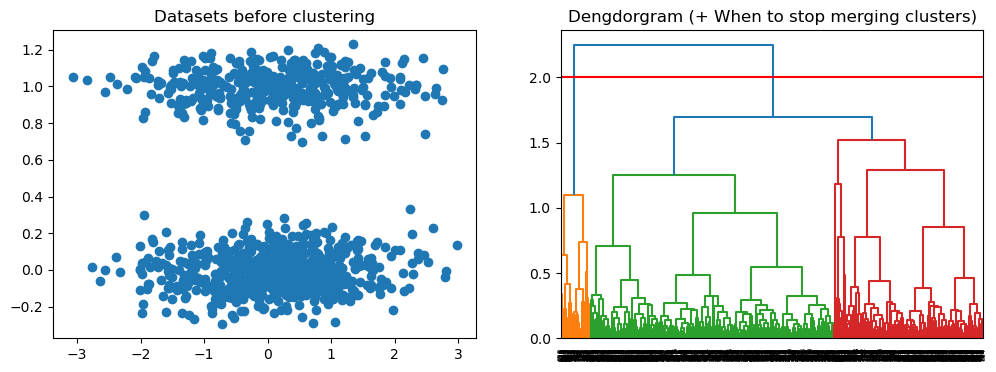

In [58]:
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as shc

s_hier_df = pd.read_csv("long2.csv")

h1_training_points = s_hier_df[["col1", "col2"]]
h1_training_labels = s_hier_df["target"]

plt.figure(figsize=(12, 4))

# 원본 데이터셋 분포
plt.subplot(1, 2, 1)
plt.scatter(h1_training_points["col1"], h1_training_points["col2"])
plt.title("Datasets before clustering")

# Dengdorgram 및 클러스터 병합 멈춰야할 시기 표시
plt.subplot(1, 2, 2)
dend=shc.dendrogram(shc.linkage(h1_training_points , method='average'))
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.title("Dengdorgram (+ When to stop merging clusters)")
plt.show()

**&rarr; 'long2.csv' 데이터셋의 Dengdorgram 결과, larger gap을 기준으로 자르면 2개의 클러스터를 생성할 수 있다.**

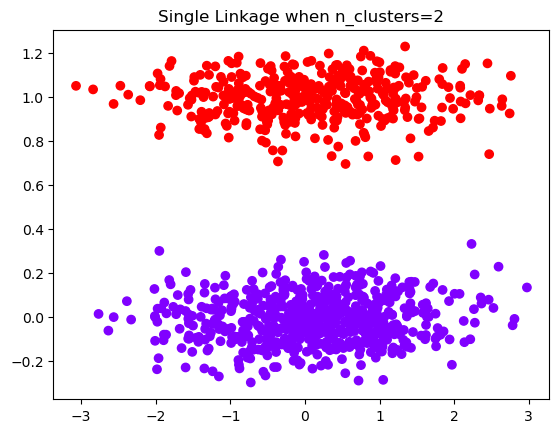

In [59]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt

agglo_single = AgglomerativeClustering(n_clusters=2, linkage="single").fit(h1_training_points)

plt.scatter(h1_training_points["col1"], h1_training_points["col2"], c=agglo_single.labels_, cmap='rainbow')
plt.title("Single Linkage when n_clusters=2")
plt.show()

* **Linking method**
    * **Single-linkage &larr; pick**
    * Complete-linkage
    * Average-linkage

**&rarr; 클러스터의 개수를 2개로 지정하고 최단연결법으로 hierarchical clustering 진행 결과 위와 같이 나타난다.**

---------------------

**<최적의 cluster 개수 구하기>**

In [60]:
# 최적의 값 구하는 알고리즘
h_max = 0.0

for a in range(1,100):
    agglo_single = AgglomerativeClustering(n_clusters=a, linkage="single").fit(h1_training_points)
    h_arc = adjusted_rand_score(h1_training_labels, agglo_single.labels_)
    if(h_max < h_arc):
        h_max = h_arc
        s_result_a = a

print("agglo_single's result_a : ",as_result_a)
print("agglo_single's arc : ",h_max)

agglo_single's result_a :  2
agglo_single's arc :  1.0


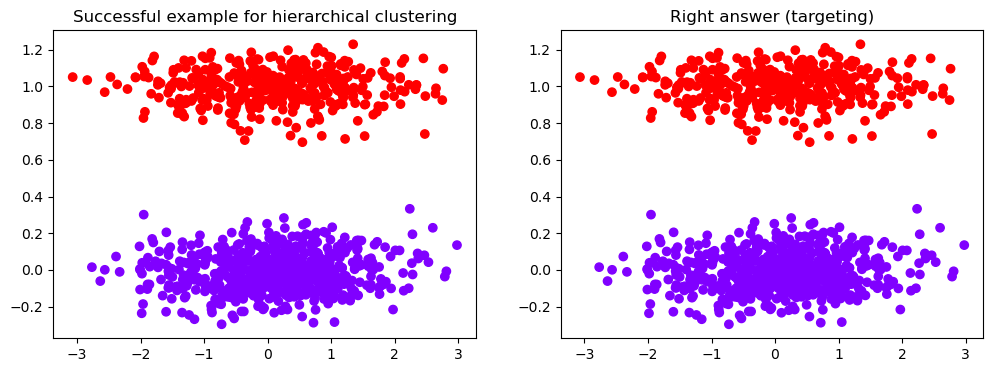

In [61]:
plt.figure(figsize=(12, 4))

agglo_single = AgglomerativeClustering(n_clusters=s_result_a, linkage="single").fit(h1_training_points)

plt.subplot(1, 2, 1)
plt.scatter(h1_training_points["col1"], h1_training_points["col2"], c=agglo_single.labels_, cmap='rainbow')
plt.title("Successful example for hierarchical clustering")

plt.subplot(1, 2, 2)
plt.scatter(h1_training_points["col1"], h1_training_points["col2"], c=h1_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()

* **Hierarchical Clustering의 장점**
    * single linkage : non-elliptical shapes 다룰 수 있다.
    * 덴드로그램을 이용한 군집화 과정 확인이 가능하다.
    * 다양한 거리 척도를 활용할 수 있다. (Single-linkage, Complete-linkage, Average-linkage 등)
---------
Single-linkage 방법을 사용하여 'long2.csv' 데이터셋을 클러스터링한 결과는 왼쪽 그래프다. <br>
정답과 비교하였을 때 완벽하게 같은 모습을 보여준다. <br>
클러스터링 정답과 비교하였을 때 100%의 정확도를 보여주므로 성공적인 클러스터링 결과를 얻었다고 할 수 있다. <br>
덴드로그램을 이용하여 군집화 과정을 확인하고, 클러스터 병합을 중지할 지점을 정한 결과 2개의 클러스터로 나눌 수 있었다. <br>
이는 AgglomerativeClustering으로 최적의 결과를 찾은 경우와 같음을 확인할 수 있다. <br>

### **1-(3) dbscan**

**<군집화를 하지 않은 원본 데이터셋>**

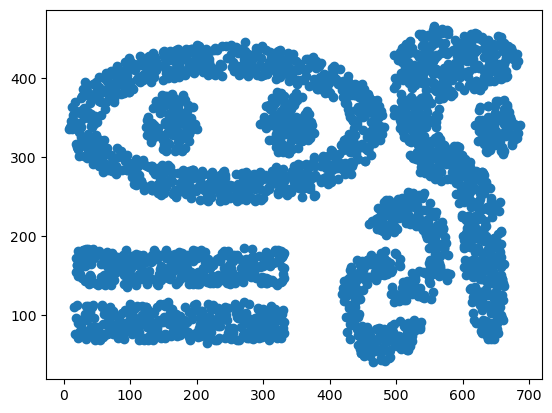

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

s_dbscan_df = pd.read_csv("complex9.csv")

d1_training_points = s_dbscan_df[["col1", "col2"]]
d1_training_labels = s_dbscan_df["target"]

plt.scatter(d1_training_points["col1"], d1_training_points["col2"])
plt.show()

**<최적의 cluster 개수 구하기>**

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score
# 최적의 값 구하는 알고리즘
max = 0.0
a = 0.1
b = 1

for a in range( 1000,2000,1):
    for b in range(1,30,1):
        dbscan = DBSCAN(eps=a*0.01, min_samples=b).fit(d1_training_points)
        arc = adjusted_rand_score(d1_training_labels, dbscan.labels_)
        if(max < arc):
            max = arc
            d1_result_a = a
            d1_result_b = b

print("eps :",d1_result_a*0.01)
print("min_samples :", d1_result_b)
print("DBSCAN arc :",max)

eps : 16.84
min_samples : 11
DBSCAN arc : 0.9997646516360312


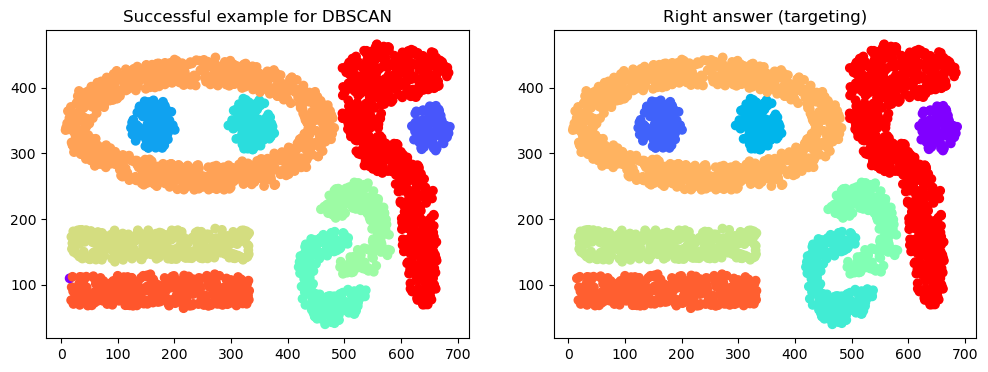

In [3]:
dbscan = DBSCAN(eps=d1_result_a*0.01, min_samples=d1_result_b).fit(d1_training_points)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(d1_training_points["col1"], d1_training_points["col2"], c=dbscan.labels_, cmap='rainbow')
plt.title("Successful example for DBSCAN")

plt.subplot(1, 2, 2)
plt.scatter(d1_training_points["col1"], d1_training_points["col2"], c = d1_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()

* **DBSCAN Clustering의 장점**
    * 임의 모양의 클러스터를 감지할 수 있으며, 데이터 포인트가 밀집된 영역을 식별이 가능하다. <br>
    * 클러스터의 개수를 미리 알 필요가 없으며, 자동으로 클러스터 개수를 결정한다. <br>
    * 데이터 포인트의 밀도에 따라 클러스터를 형성하여, 불규칙한 분포의 데이터에서도 잘 작동한다. <br>
    * 클러스터의 모양 및 크기에 민감하지 않아, 데이터의 특성에 따라 적합한 메트릭을 선택할 수 있는 유연성을 제공한다. <br>
-----------------------
DBSCAN 방법을 사용하여 'complex9.csv' 데이터셋을 클러스터링한 결과는 왼쪽 그래프다. <br>
정답과 비교하였을 때 하나의 데이터가 다르게 분류되었지만, 나머지 데이터에 대해서는 완벽하게 일치한다. <br>
클러스터링 정답과 비교하였을 때 99%의 정확도를 보여주므로 성공적인 클러스터링 결과를 얻었다고 할 수 있다. <br>
이 데이터셋은 클러스터의 모양과 데이터 분포가 다양하고 복잡한 특성을 가지고 있다. <br>
 위 결과를 통해 DBSCAN 클러스터링은 데이터의 밀도를 기반으로 클러스터를 형성하며, <br>
클러스터의 모양, 개수, 및 크기에 민감하지 않아 다양한 유형의 데이터에 적용하기 좋다는 점을 알 수 있다. <br>

## **2. One unsuccessful example for k-means, hierarchical clustering and dbscan**

### **2-(1) k-means**

**<군집화를 하지 않은 원본 데이터셋>**

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

**ex1)**

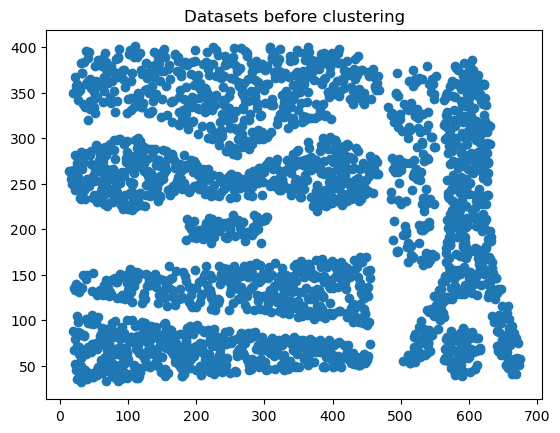

In [21]:
ns_kmeans_df = pd.read_csv("complex8.csv")

k2_training_points = ns_kmeans_df[["col1", "col2"]]
k2_training_labels = ns_kmeans_df["target"]

plt.scatter(k2_training_points["col1"], k2_training_points["col2"])
plt.title("Datasets before clustering")
plt.show()

In [22]:
import warnings # 오류제어
warnings.filterwarnings("ignore", category=FutureWarning) #오류삭제

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
# 최적의 값 구하는 알고리즘
max=0.0
for a in range(1,50):
    kmeans = KMeans(n_clusters=a).fit(k2_training_points)
    arc = adjusted_rand_score(k2_training_labels, kmeans.labels_)
    if(max < arc):
        max = arc
        result_a = a

print("k-means's result_a : ",result_a)
print("k-means's arc : ",max)

k-means's result_a :  5
k-means's arc :  0.45702158069000753


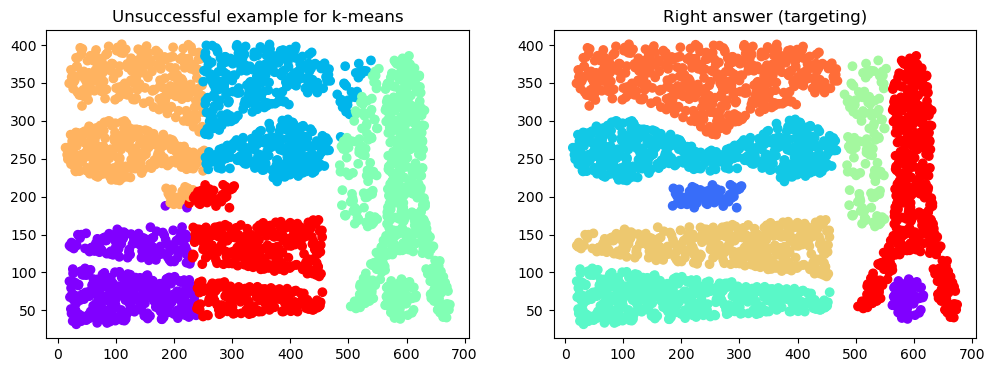

In [24]:
kmeans = KMeans(n_clusters=result_a).fit(k2_training_points)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(k2_training_points["col1"], k2_training_points["col2"], c=kmeans.labels_, cmap='rainbow')
plt.title("Unsuccessful example for k-means")

plt.subplot(1, 2, 2)
plt.scatter(k2_training_points["col1"], k2_training_points["col2"], c = k2_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()

* **k-means Clustering의 단점** <br>
    * k 값을 임의로 정해야한다.
    * Outlier에 민감하다.
    * 다양한 크기와 밀도의 데이터 클러스터링에 취약하다.
----------------
k-means 방법을 사용하여 'complex8.csv' 데이터셋을 클러스터링한 결과는 왼쪽 그래프다. <br>
정답 데이터의 클러스터링 결과와는 달리 왼쪽 데이터에 대해서는 세로를 기준으로 데이터셋이 클러스터링된 결과를 볼 수 있다. <br>
오른쪽 데이터에 대해서는 세개의 군집으로 나누어진 정답과 달리 하나의 클러스터링으로 묶인 것을 볼 수 있다. <br>
클러스터링 정답과 비교하였을 때 약 45%의 정확도로 클러스터링 결과가 완벽하지 않다고 할 수 있다. <br>
이를 통해 데이터셋에 클러스터의 크기가 다른 경우, <br>
k-means는 모든 클러스터를 동일한 크기로 간주하여 작은 클러스터가 무시될 수 있으며 클러스터링에 적합하지않다는 것을 알 수 있다. <br>

**ex2)**

C:\Users\ysm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ysm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ysm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ysm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

k-means's result_a :  7
k-means's arc :  0.6337080884308176


C:\Users\ysm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


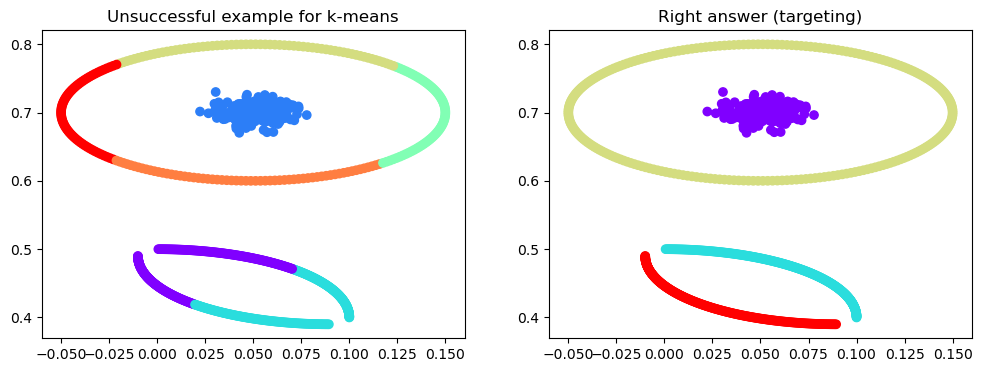

In [30]:
ns2_kmeans_df = pd.read_csv("donutcurves.csv")

k3_training_points = ns2_kmeans_df[["col1", "col2"]]
k3_training_labels = ns2_kmeans_df["target"]

max=0.0
for a in range(1,50):
    kmeans = KMeans(n_clusters=a).fit(k3_training_points)
    arc = adjusted_rand_score(k3_training_labels, kmeans.labels_)
    if(max < arc):
        max = arc
        result_a = a

print("k-means's result_a : ",result_a)
print("k-means's arc : ",max)

kmeans2 = KMeans(n_clusters=result_a).fit(k3_training_points)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(k3_training_points["col1"], k3_training_points["col2"], c=kmeans2.labels_, cmap='rainbow')
plt.title("Unsuccessful example for k-means")

plt.subplot(1, 2, 2)
plt.scatter(k3_training_points["col1"], k3_training_points["col2"], c = k3_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()


k-means 방법을 사용하여 'donutcurves.csv' 데이터셋을 클러스터링한 결과는 왼쪽 그래프다. <br>
정답 데이터의 클러스터링 결과와는 달리 타원형 클러스터가 하나로 군집화되지않고 나누어짐을 알 수 있다. <br>
오른쪽 데이터에 대해서는 세개의 군집으로 나누어진 정답과 달리 하나의 클러스터링으로 묶인 것을 볼 수 있다. <br>
클러스터링 정답과 비교하였을 때 약 63%의 정확도로 시각화한 굘과 클러스터링 잘 수행되지 않음을 알 수 있다. <br>
이를 통해 k-means 타원형 클러스터어세 부정확한 결과를 제공한다는 것을 확인하였다.

### **2-(2) hierarchical clustering**

**<군집화를 하지 않은 원본 데이터셋 & Dengdorgram>**

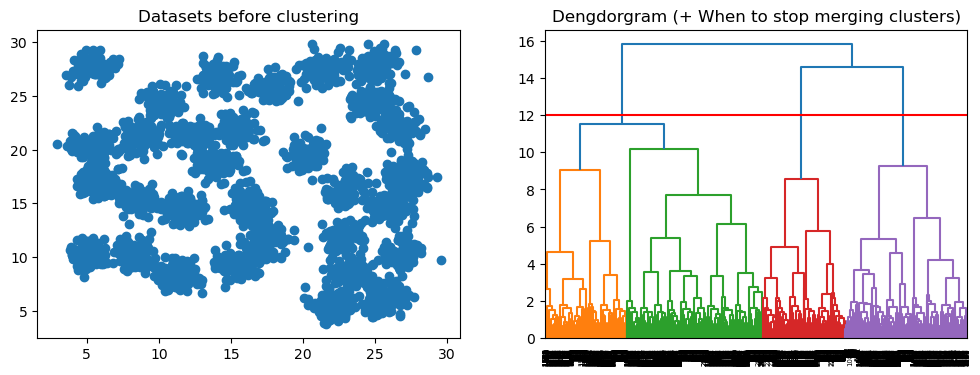

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as shc

ns_hier_df = pd.read_csv("D31.csv")

h2_training_points = ns_hier_df[["col1", "col2"]]
h2_training_labels = ns_hier_df["target"]

plt.figure(figsize=(12, 4))

# 원본 데이터셋 분포
plt.subplot(1, 2, 1)
plt.scatter(h2_training_points["col1"], h2_training_points["col2"])
plt.title("Datasets before clustering")

# Dengdorgram 및 클러스터 병합 멈춰야할 시기 표시
plt.subplot(1, 2, 2)
dend=shc.dendrogram(shc.linkage(h2_training_points , method='average'))
plt.axhline(y = 12, color = 'r', linestyle = '-')
plt.title("Dengdorgram (+ When to stop merging clusters)")
plt.show()

**→ 'D31.csv' 데이터셋의 Dengdorgram 결과, larger gap을 기준으로 자르면 3개의 클러스터를 생성할 수 있다.**

-----------

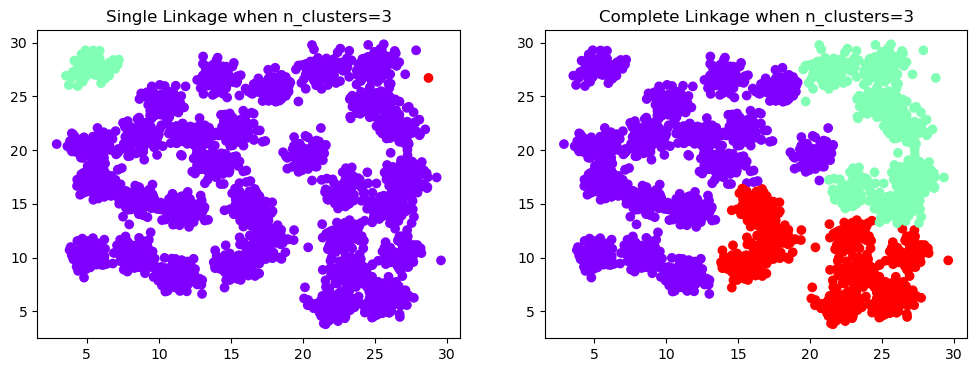

In [18]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

agglo_single = AgglomerativeClustering(n_clusters=3, linkage="single").fit(h2_training_points)
agglo_complete = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(h2_training_points)

plt.subplot(1, 2, 1)
plt.scatter(h2_training_points["col1"], h2_training_points["col2"], c=agglo_single.labels_, cmap='rainbow')
plt.title("Single Linkage when n_clusters=3")

plt.subplot(1, 2, 2)
plt.scatter(h2_training_points["col1"], h2_training_points["col2"], c = agglo_complete.labels_, cmap='rainbow')
plt.title("Complete Linkage when n_clusters=3")
plt.show()

**&rarr; 클러스터의 개수를 3개로 지정하고 최단연결법과 복합연결법으로 hierarchical clustering 진행 결과 위와 같이 나타난다.** <br>
클러스터링 결과 부정확한 모습을 확인할 수 있다. 

-----

**<최적의 cluster 개수 구하기>**

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score
# 최적의 값 구하는 알고리즘
sh_max = 0.0
ch_max = 0.0

for a in range(1,100):
    agglo_single = AgglomerativeClustering(n_clusters=a, linkage="single").fit(h2_training_points)
    agglo_complete = AgglomerativeClustering(n_clusters=a, linkage="complete").fit(h2_training_points)
    
    s_h2_arc = adjusted_rand_score(h2_training_labels, agglo_single.labels_)
    c_h2_arc = adjusted_rand_score(h2_training_labels, agglo_complete.labels_)
    
    if(sh_max < s_h2_arc):
        sh_max = s_h2_arc
        s_result_a = a

    if(ch_max < c_h2_arc):
        ch_max = c_h2_arc
        c_result_a = a

print("agglo_single's result_a : ",s_result_a)
print("agglo_single's arc : ",sh_max)

print("agglo_complete's result_a : ",c_result_a)
print("agglo_complete's arc : ",ch_max)

agglo_single's result_a :  94
agglo_single's arc :  0.41043330001969824
agglo_complete's result_a :  31
agglo_complete's arc :  0.9231683931206259


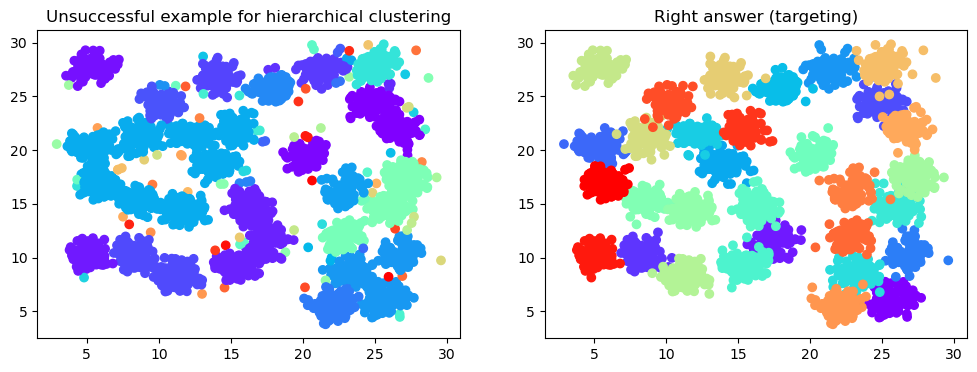

In [21]:
plt.figure(figsize=(12, 4))

agglo_single = AgglomerativeClustering(n_clusters=s_result_a, linkage="single").fit(h2_training_points)

plt.subplot(1, 2, 1)
plt.scatter(h2_training_points["col1"], h2_training_points["col2"], c=agglo_single.labels_, cmap='rainbow')
plt.title("Unsuccessful example for hierarchical clustering")

plt.subplot(1, 2, 2)
plt.scatter(h2_training_points["col1"], h2_training_points["col2"], c=h2_training_labels, cmap='rainbow')
plt.title("Right answer (targeting)")
plt.show()

----------------
최단연결법으로 hierarchical clustering을 진행할 경우 가장 최적의 경우는 클러스터의 개수가 94개인 경우다. <br>
이 경우에 정확도는 41%로 클러스터의 결과가 부정확함을 알 수 있다. <br>
데이터의 클러스터링 결과 정답과 확연히 다른 모습을 띤다. <br>
군집 간 거리가 짧은 군집끼리 합쳐, 연결 길이의 문제로 정답의 의도와는 다르게 클러스터링 된 결과를 볼 수 있다. <br>
또한, 이상치에 민감하다는 단점이 있어, 해당 이상치가 있는 군집과 가장 가까운 다른 군집과 합쳐서 원치않은 결과가 나타남을 알 수 있다. <br>

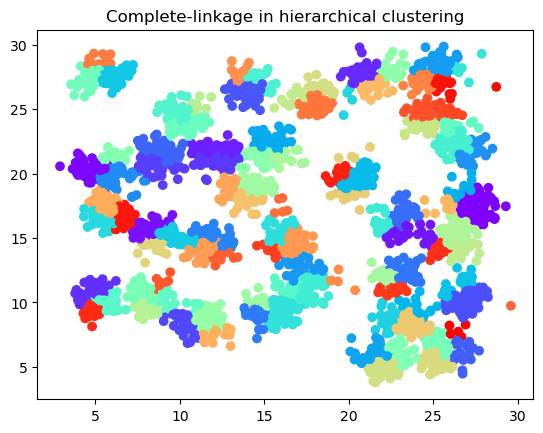

In [24]:
agglo_single = AgglomerativeClustering(n_clusters=c_result_a, linkage="single").fit(h2_training_points)

plt.scatter(h2_training_points["col1"], h2_training_points["col2"], c=agglo_complete.labels_, cmap='rainbow')
plt.title("Complete-linkage in hierarchical clustering")
plt.show()

최장연결법으로 hierarchical clustering을 진행할 경우 가장 최적의 경우는 클러스터의 개수가 31개인 경우다. <br>
이 경우에 정확도는 약 92%로 최단연결법보다 높은 정확도를 보여준다. <br>
하지만 이 또한 정답과는 비교적 다르게 군집화됨을 확인할 수 있다. <br>

### **2-(3) dbscan**

DBSCAN의 경우 {https://github.com/milaan9/Clustering-Datasets} 에서 주어지는 데이터셋을 <br>
클러스터링한 결과 성공적이지 않은 클러스터링 결과가 발견되지 않았다. <br>

때문에, 인터넷에서 찾은 dbscan의 성공적이지 않은 클러스터링 결과를 참고용으로 첨부하였다. <br>
**DBSCAN의 단점**
DBSCAN의 단점은 다른 밀도 분포를 가진 데이터의 군집 분석을 잘 하지 못한다는 것이다. <br>
오른쪽 DBSCAN 결과를 보면, 밀도가 높은 곳에 집중하다 보니 왼쪽에 밀도가 낮은 곳의 데이터를 <br>
하나의 군집으로 인식하지 못하고 노이즈 포인트로 구분해서 모두 버려버리는 결과를 낳았다. <br>

출처 : https://lucy-the-marketer.kr/ko/growth/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EA%B3%BC-dbscan/
